# Setup

In [ ]:
# Tweepy
import tweepy

# DataFrame
import pandas as pd

# Matplot
from matplotlib import pyplot as plt

# Utility
import numpy as np
from numpy import array       
from numpy import asarray
from numpy import zeros
import math
import re
import string
import pickle
import random
import csv
from IPython.display import display
from IPython.display import SVG

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, f1_score
# Scikit-learn algorithms
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Prepare training data

In [ ]:
# Load trainlist taglist
with open('train_list_(cleaned).pickle', 'rb') as handle:
    train_list = pickle.load(handle)
with open('tag_list_(cleaned).pickle', 'rb') as handle:
    tag_list = pickle.load(handle)

def get_features(index, word, sent):
    prev_word = 'BOS'
    next_word = 'EOS'
    if len(sent) > index+1:
        next_word = sent[index+1]
    if index-1 > 0:
        prev_word = sent[index-1]
    val, tag = pos_tag([word])[0]
    prev_word, prev_tag = pos_tag([prev_word])[0]
    next_word, next_tag = pos_tag([next_word])[0]
    dic = {
        "word": val,
        "postag": tag,
        "nextword": next_word,
        "nextwordtag": next_tag,
        "previousword": prev_word,
        "previoustag": prev_tag,
    }
    return dic

def extract_features(lst):
  new_list = []
  for sent in lst:
    for i in range(len(sent)):
      new_list.append(get_features(i, sent[i] , sent))
  
  return new_list

def extract_label(lst):
  new_list = []
  for sent in lst:
    for word in sent:
      new_list.append(word)
  
  return new_list

# text to feature
x_data = extract_features(train_list)
y_data = extract_label(tag_list)

In [ ]:
x_data[0]

{'nextword': 'total',
 'nextwordtag': 'JJ',
 'postag': 'CD',
 'previoustag': 'NN',
 'previousword': 'BOS',
 'word': '65'}

In [ ]:
# 70% training and 30% test size
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=7777)

# to DictVctorizer
vec = DictVectorizer(sparse=False)
x_train = vec.fit_transform(x_train)
x_test = vec.transform(x_test)

In [ ]:
x_train[5]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_train[5]

0

In [ ]:
pickle.dump(vec, open('dictVectorizer.pickle', 'wb'))

# Training

## KNN

In [ ]:
%%time
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

labels = list(neigh.classes_)
labels.remove(0)

neigh_acc = neigh.score(x_test, y_test)
print('Accuracy:', neigh_acc)

y_pred = neigh.predict(x_test)
print(classification_report(y_test, y_pred, labels=labels))

neigh_f1_score = f1_score(y_test, y_pred, average='macro')

Accuracy: 0.9866387215090385
              precision    recall  f1-score   support

           1       0.94      0.95      0.94       218
           2       0.93      0.87      0.90       205

   micro avg       0.93      0.91      0.92       423
   macro avg       0.93      0.91      0.92       423
weighted avg       0.93      0.91      0.92       423

CPU times: user 4min 30s, sys: 216 ms, total: 4min 30s
Wall time: 4min 29s


## Naive Bayes

In [ ]:
%%time
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

labels = list(bnb.classes_)
labels.remove(0)

bnb_acc = bnb.score(x_test, y_test)
print('Accuracy:', bnb_acc)

y_pred = bnb.predict(x_test)
print(classification_report(y_test, y_pred, labels=labels))

bnb_f1_score = f1_score(y_test, y_pred, average='macro')

Accuracy: 0.9753733298401887
              precision    recall  f1-score   support

           1       0.85      0.91      0.88       218
           2       0.90      0.82      0.86       205

   micro avg       0.87      0.87      0.87       423
   macro avg       0.88      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423

CPU times: user 489 ms, sys: 190 ms, total: 680 ms
Wall time: 449 ms


## Decision Tree

In [ ]:
%%time
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None)
clf = clf.fit(x_train, y_train)

labels = list(clf.classes_)
labels.remove(0)

clf_acc = clf.score(x_test, y_test)
print('Accuracy:', clf_acc)

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, labels=labels))

clf_f1_score = f1_score(y_test, y_pred, average='macro')

Accuracy: 0.9869007073618025
              precision    recall  f1-score   support

           1       0.94      0.94      0.94       218
           2       0.93      0.87      0.90       205

   micro avg       0.93      0.91      0.92       423
   macro avg       0.93      0.90      0.92       423
weighted avg       0.93      0.91      0.92       423

CPU times: user 1.44 s, sys: 65.7 ms, total: 1.51 s
Wall time: 1.44 s


## Random Forest

In [ ]:
%%time
rf_clf = RandomForestClassifier(random_state=2222)
rf_clf.fit(x_train, y_train)

labels = list(rf_clf.classes_)
labels.remove(0)

rf_clf_acc = rf_clf.score(x_test, y_test)
print('Accuracy:', rf_clf_acc)

y_pred = rf_clf.predict(x_test)
print(classification_report(y_test, y_pred, labels=labels))

rf_clf_f1_score = f1_score(y_test, y_pred, average='macro')

Accuracy: 0.9879486507728583
              precision    recall  f1-score   support

           1       0.95      0.94      0.94       218
           2       0.95      0.87      0.91       205

   micro avg       0.95      0.91      0.93       423
   macro avg       0.95      0.91      0.93       423
weighted avg       0.95      0.91      0.93       423

CPU times: user 6 s, sys: 13 ms, total: 6.01 s
Wall time: 5.98 s


In [ ]:
pickle.dump(rf_clf, open('rf.pickle', 'wb'))

## SVM

In [ ]:
%%time
svm_clf = SVC()
svm_clf.fit(x_train, y_train)

labels = list(svm_clf.classes_)
labels.remove(0)

svm_clf_acc = svm_clf.score(x_test, y_test)
print('Accuracy:', svm_clf_acc)

y_pred = svm_clf.predict(x_test)
print(classification_report(y_test, y_pred, labels=labels))

svm_clf_f1_score = f1_score(y_test, y_pred, average='macro')

Accuracy: 0.9869007073618025
              precision    recall  f1-score   support

           1       0.94      0.95      0.95       218
           2       0.95      0.86      0.90       205

   micro avg       0.94      0.91      0.93       423
   macro avg       0.94      0.91      0.92       423
weighted avg       0.94      0.91      0.92       423

CPU times: user 1min 20s, sys: 58.9 ms, total: 1min 20s
Wall time: 1min 19s


## ========================================

## Graph

### Accuracy Score

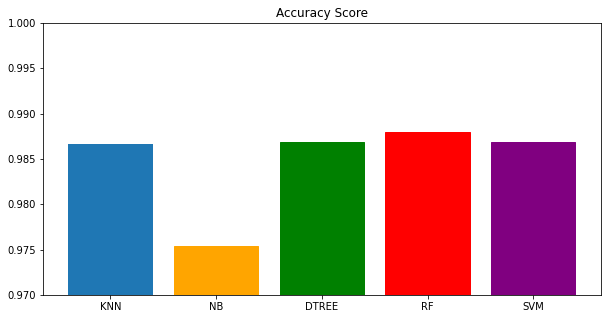

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Accuracy Score')
axes = plt.gca()
axes.set_ylim([0.97,1.0])
bar = plt.bar(['KNN', 'NB', 'DTREE', 'RF', 'SVM'], [neigh_acc, bnb_acc, clf_acc, rf_clf_acc, svm_clf_acc])
bar[1].set_color('orange')
bar[2].set_color('green')
bar[3].set_color('red')
bar[4].set_color('purple')
plt.show()

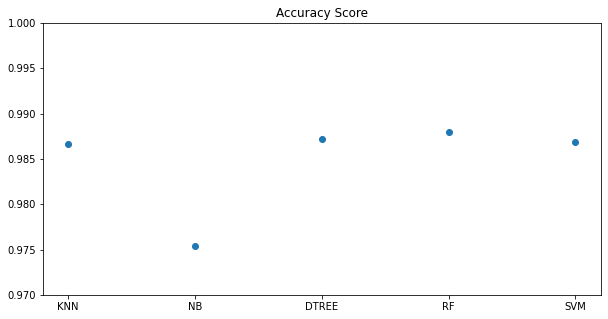

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Accuracy Score')
axes = plt.gca()
axes.set_ylim([0.97,1.0])
plt.scatter(['KNN', 'NB', 'DTREE', 'RF', 'SVM'], [neigh_acc, bnb_acc, clf_acc, rf_clf_acc, svm_clf_acc])
plt.show()

### F1 Score

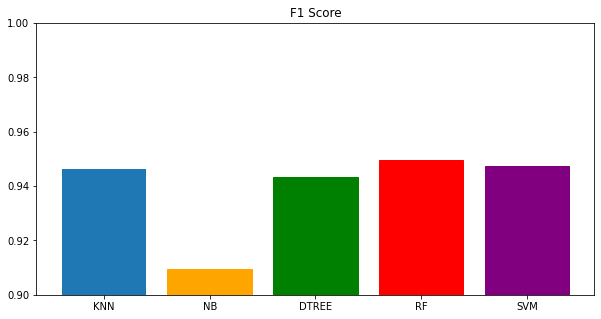

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('F1 Score')
axes = plt.gca()
axes.set_ylim([0.9,1.0])
bar = plt.bar(['KNN', 'NB', 'DTREE', 'RF', 'SVM'], [neigh_f1_score, bnb_f1_score, clf_f1_score, rf_clf_f1_score, svm_clf_f1_score])
bar[1].set_color('orange')
bar[2].set_color('green')
bar[3].set_color('red')
bar[4].set_color('purple')
plt.show()

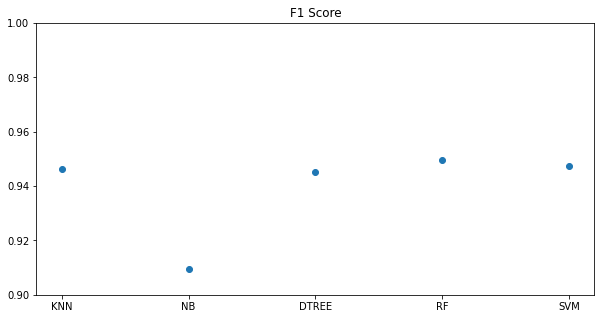

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('F1 Score')
axes = plt.gca()
axes.set_ylim([0.9,1.0])
plt.scatter(['KNN', 'NB', 'DTREE', 'RF', 'SVM'], [neigh_f1_score, bnb_f1_score, clf_f1_score, rf_clf_f1_score, svm_clf_f1_score])
plt.show()